In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
youtube_data = pd.read_csv("youtube_dataset.csv", index_col="video_id")

In [3]:
youtube_data.head()

,published_at,title,channel_id,channel_title,view_count,like_count,dislike_count,favorite_count,comment_count,duration,...,channel_description,channel_published_at,videoCount,tags,category_id,default_language,default_audio_language,license,content_rating,share_count
video_id,,,,,,,,,,,,,,,,,,,,,
LyZbFPQLJSI,2024-03-10T15:55:30Z,Cooking with Mommy ! BillionSurpriseToys Nurse...,UCRx3mKNUdl8QE06nEug7p6Q,BillionSurpriseToys - Nursery Rhymes & Cartoons,443,NaN,NaN,0,NaN,00:00:00,...,Welcome to the world of Billion Surprise Toys!...,2013-10-25T23:18:43Z,982653,"['BillionSurpriseToys', 'english', 'kids carto...",24,en,en,youtube,{},NaN
UpdkbTaDEtI,2021-03-10T14:00:16Z,"This Is How Fish Was Fried 3,000 Years Ago! De...",UCj4KP216972cPp2w_BAHy8g,WILDERNESS COOKING,36659,3259.0,NaN,0,242.0,02:31:47,...,"I am Tawakkul, a 50-year-old Gamarvan resident...",2020-01-15T12:04:14.378435Z,367,"['wilderness', 'wilderness cooking', 'recipe',...",26,en,en,youtube,{},NaN
Io1l_CEqPKA,2024-03-10T13:00:15Z,Crayfish Straight from the River! Cooking In T...,UCjAKzWYZLayOQfSud0lU1vQ,Royal Cooking,12421,634.0,NaN,0,63.0,01:30:38,...,Hello everyone This is our second channel for ...,2022-07-11T08:30:44.046857Z,197,"['cooking show', 'cooking', 'cooking outdoor',...",22,NaN,en,youtube,{},NaN
RRr3MtjUTDI,2024-03-10T12:40:35Z,""" Chicken Vegetable Fried Rice "" Bajias Cooking",UCtJFmSBTZHLBgRDwW9H2qHQ,Bajiascooking,679,49.0,NaN,0,0.0,00:04:34,...,For everyone who loves to cook!\n\nContact/Par...,2009-05-13T23:07:59Z,195748,"['Bajias Cooking Recipe', 'Traditional', 'Food...",27,NaN,NaN,youtube,{},NaN
oKEuCmzU6pA,2024-03-10T12:00:13Z,3 Days: Livestock Farm Cleaning Process - Cook...,UCzOzzXXz5R3aytqUR5LkNZg,Lý Thị Ca,39289,2237.0,NaN,0,211.0,00:30:58,...,I am a girl from a small village in the countr...,2019-03-27T02:29:49Z,397,"['Cooking', 'Lý Thị Ca', 'Livestock', 'Farm', ...",22,en,en,youtube,{},NaN


### Step 1:
## Preprocessing

In [4]:
from datetime import timedelta

# Remove duplicates
youtube_data.drop_duplicates(inplace=True)

# The data in 'channel_published_at' is messy and we will use RE to sort it out
# Define regex pattern to extract date part
pattern = r'^(\d{4}-\d{2}-\d{2})'

# Extract date part using regex
youtube_data['channel_published_at'] = youtube_data['channel_published_at'].str.extract(pattern)

# Convert 'published_at' and 'channel_published_at' to datetime
youtube_data['published_at'] = pd.to_datetime(youtube_data['published_at'])
youtube_data['channel_published_at'] = pd.to_datetime(youtube_data['channel_published_at'])
youtube_data['channel_published_at'] = youtube_data['channel_published_at'].dt.tz_localize('UTC')



# Extract new features from text columns
youtube_data['number_of_words_in_title'] = youtube_data['title'].apply(lambda x: len(x.split()))
youtube_data['number_of_words_in_channel_description'] = youtube_data['channel_description'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
youtube_data['number_of_tags'] = youtube_data['tags'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Convert 'duration' to seconds
def duration_to_seconds(duration):
    try:
        time_parts = duration.split(':')
        return int(time_parts[0]) * 3600 + int(time_parts[1]) * 60 + int(time_parts[2])
    except:
        return None

youtube_data['duration_seconds'] = youtube_data['duration'].apply(duration_to_seconds)

# Calculate the number of days since the first video in the dataset was published
youtube_data['days_since_published'] = (youtube_data['published_at'] - youtube_data['published_at'].min()).dt.days
# Calculate the number of days since the first video in the channel was published
youtube_data['days_since_channel_published'] = (youtube_data['published_at'] - youtube_data['channel_published_at']).dt.days

# Remove unnecessary columns
columns_to_drop = ['duration', 'favorite_count', 'dislike_count', 'channel_title', 'default_language', 
                   'default_audio_language', 'license', 'content_rating', 'share_count', 'channel_description']
youtube_data.drop(columns_to_drop, axis=1, inplace=True)

# Check for missing values
youtube_data.isnull().sum()

published_at                               0
title                                      0
channel_id                                 0
view_count                                 0
like_count                                22
comment_count                              6
definition                                 0
subscriber_count                           0
total_channel_views                        0
channel_published_at                       0
videoCount                                 0
tags                                       0
category_id                                0
number_of_words_in_title                   0
number_of_words_in_channel_description     0
number_of_tags                             0
duration_seconds                           0
days_since_published                       0
days_since_channel_published               0
dtype: int64

In [5]:
youtube_data.loc['yGfYY2fS71U', 'duration_seconds']

3647

In [6]:
# Fill in missing values with 0 - videos without likes/comments have no relevant key
youtube_data['like_count'] = youtube_data['like_count'].fillna(0)
youtube_data['comment_count'] = youtube_data['comment_count'].fillna(0)

In [7]:
# Calculate the ratio of likes per view and comments per view
youtube_data['likes_per_view'] = youtube_data['like_count'] / youtube_data['view_count']
youtube_data['comments_per_view'] = youtube_data['comment_count'] / youtube_data['view_count']

youtube_data.head()

,published_at,title,channel_id,view_count,like_count,comment_count,definition,subscriber_count,total_channel_views,channel_published_at,...,tags,category_id,number_of_words_in_title,number_of_words_in_channel_description,number_of_tags,duration_seconds,days_since_published,days_since_channel_published,likes_per_view,comments_per_view
video_id,,,,,,,,,,,,,,,,,,,,,
LyZbFPQLJSI,2024-03-10 15:55:30+00:00,Cooking with Mommy ! BillionSurpriseToys Nurse...,UCRx3mKNUdl8QE06nEug7p6Q,443,0.0,0.0,sd,55600000,11307898616,2013-10-25 00:00:00+00:00,...,"['BillionSurpriseToys', 'english', 'kids carto...",24,10,150,21,0,1096,3789,0.000000,0.000000
UpdkbTaDEtI,2021-03-10 14:00:16+00:00,"This Is How Fish Was Fried 3,000 Years Ago! De...",UCj4KP216972cPp2w_BAHy8g,36659,3259.0,242.0,hd,5570000,1384120463,2020-01-15 00:00:00+00:00,...,"['wilderness', 'wilderness cooking', 'recipe',...",26,15,141,36,9107,0,420,0.088900,0.006601
Io1l_CEqPKA,2024-03-10 13:00:15+00:00,Crayfish Straight from the River! Cooking In T...,UCjAKzWYZLayOQfSud0lU1vQ,12421,634.0,63.0,hd,2040000,853751715,2022-07-11 00:00:00+00:00,...,"['cooking show', 'cooking', 'cooking outdoor',...",22,11,26,44,5438,1095,608,0.051043,0.005072
RRr3MtjUTDI,2024-03-10 12:40:35+00:00,""" Chicken Vegetable Fried Rice "" Bajias Cooking",UCtJFmSBTZHLBgRDwW9H2qHQ,679,49.0,0.0,hd,408000,147522376,2009-05-13 00:00:00+00:00,...,"['Bajias Cooking Recipe', 'Traditional', 'Food...",27,8,8,9,274,1095,5415,0.072165,0.000000
oKEuCmzU6pA,2024-03-10 12:00:13+00:00,3 Days: Livestock Farm Cleaning Process - Cook...,UCzOzzXXz5R3aytqUR5LkNZg,39289,2237.0,211.0,hd,1180000,577464490,2019-03-27 00:00:00+00:00,...,"['Cooking', 'Lý Thị Ca', 'Livestock', 'Farm', ...",22,14,72,8,1858,1095,1810,0.056937,0.005370


### Step 2:
## Clustering

First we'll want to visualize the data.

Since our data have more then 3 dimetions, We'll use t-SNE algorithm for 2D visualization

In [8]:
youtube_data.columns.tolist()

['published_at',
 'title',
 'channel_id',
 'view_count',
 'like_count',
 'comment_count',
 'definition',
 'subscriber_count',
 'total_channel_views',
 'channel_published_at',
 'videoCount',
 'tags',
 'category_id',
 'number_of_words_in_title',
 'number_of_words_in_channel_description',
 'number_of_tags',
 'duration_seconds',
 'days_since_published',
 'days_since_channel_published',
 'likes_per_view',
 'comments_per_view']

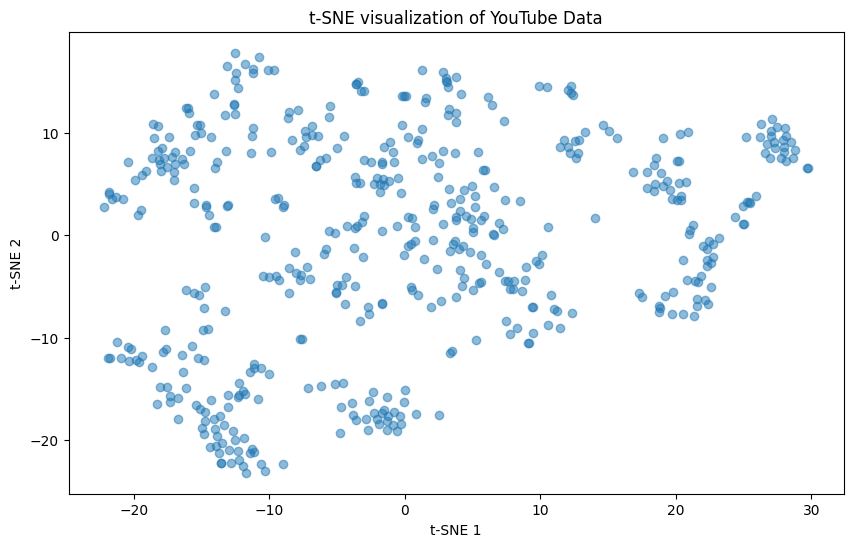

In [9]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Selecting a subset of relevant numerical features for t-SNE
features = [
    'view_count', 'like_count', 'comment_count', 'subscriber_count', 'total_channel_views', 'videoCount', 'number_of_words_in_title',
    'number_of_words_in_channel_description', 'number_of_tags', 'duration_seconds', 'days_since_published', 'days_since_channel_published'
]
data_subset = youtube_data[features]

# Standardizing the data (necessary for t-SNE)
scalar = StandardScaler()
data_subset_scaled = scalar.fit_transform(data_subset)

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(data_subset_scaled)

# Plotting the results of t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE visualization of YouTube Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

We can visualy detect 3 clusters from the t-SNE plot, which is quiet different from the other samples

For better understanding we'll also try PCA 

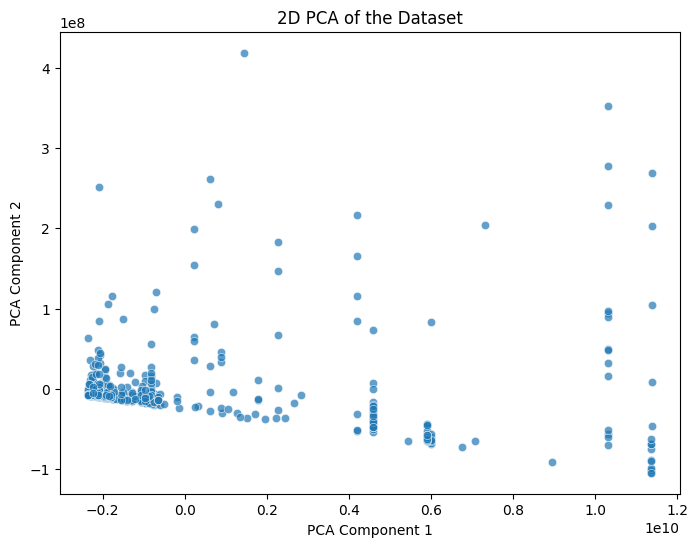

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Standardizing the data (necessary for t-SNE)
mm = MinMaxScaler()
data_subset_scaled = mm.fit_transform(data_subset)

# Assuming data_subset_scaled is your preprocessed dataset ready for PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_subset)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of the Dataset')
plt.show()

In [11]:
print(pca.explained_variance_ratio_)
print(f'Total Variance captured from the data: {np.sum(pca.explained_variance_ratio_):.3f}')

[9.99625207e-01 2.14543950e-04]
Total Variance captured from the data: 1.000


In [12]:
print(pca.components_)

[[ 7.30748698e-03  1.43511513e-04  1.08272854e-06  2.00898424e-03
   9.99971272e-01  1.00003815e-05 -2.57369997e-10 -3.11858029e-09
  -6.14626082e-11 -1.65453502e-08 -1.31035295e-08  1.24049959e-08]
 [ 9.98019476e-01  6.21976189e-02  9.54689527e-05 -5.91217742e-03
  -7.29026561e-03 -6.86206932e-04 -1.18424011e-08 -7.44546915e-09
  -1.22909734e-08 -3.75838894e-06 -4.53981835e-07 -1.33405483e-06]]


The first principal component overwhelmingly dominates, capturing almost all the variance in the dataset. This suggests that a significant amount of information about the dataset can be represented along this single dimension.

Additionally, if the PCA is capable of capturing 100% of the variance in our data, there isn't clusters. But, we can see a bunch of outliers

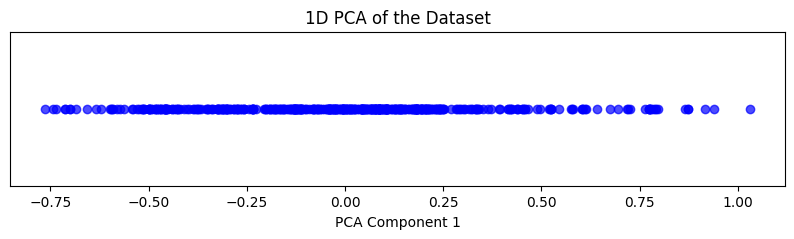

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data_subset' is your original dataset
mm = MinMaxScaler()
data_subset_scaled = mm.fit_transform(data_subset)

# Applying PCA to the scaled data for 1 component
pca = PCA(n_components=1)
data_pca_1d = pca.fit_transform(data_subset_scaled)

# 1D visualization
plt.figure(figsize=(10, 2))  # Adjust the figure size as needed
plt.scatter(data_pca_1d[:, 0], np.zeros(len(data_pca_1d)), alpha=0.7, c='blue')
plt.xlabel('PCA Component 1')
plt.title('1D PCA of the Dataset')
plt.yticks([])  # Hide the y-axis as it's not meaningful in this 1D context
plt.show()
